In [1]:
# import sys
# !{sys.executable} -m pip install sagemaker

In [2]:
import pandas as pd
import numpy as np
# from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas import Grouper
# from sagemaker.predictor import csv_serializer

sns.set()

%matplotlib inline

#### TODO
* Compare price of one or two service stations to the NSW average


In [3]:
df = pd.read_csv('fuel-prices/all_years_combined_plus_2020.csv', index_col='date', dtype={'price': np.int32}, parse_dates=True)
df.set_index(pd.date_range(min(df.index), periods=df.size, freq='D'), inplace=True, verify_integrity=True)
# df.set_index(pd.PeriodIndex(df.index), inplace=True, verify_integrity=True)
df_a = df['2017-12-01':'2018-03-31'].copy()
df_b = df['2018-12-01':'2019-03-31'].copy()
df_c = df['2019-12-01':].copy()
df_c.loc[df_c.index >= '2020-03-01'] = np.nan
df_d = df['2017-01-01':'2019-12-31'].copy()

In [4]:
# df

In [5]:
# df.info()

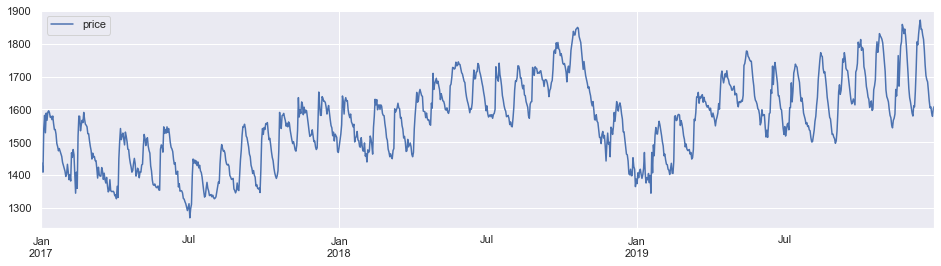

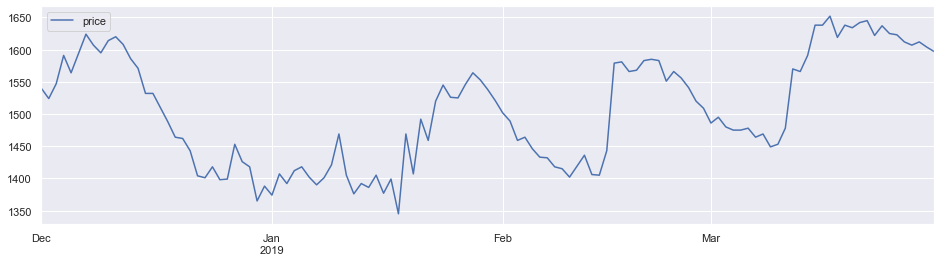

In [6]:
_ = df_d.plot(figsize=(16,4))
_ = df_a.plot(figsize=(16,4))
_ = df_b.plot(figsize=(16,4))
_ = df_c.plot(figsize=(16,4))

In [8]:
df['2020-01-01':'2020-01-07']

price
2020-01-01   1594
2020-01-02   1595
2020-01-03   1602
2020-01-04   1561
2020-01-05   1567
2020-01-06   1636
2020-01-07   1667

In [45]:
# number_of_days = 365 * 3
# dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
# df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
# df = df.merge(df_full, how='right', left_index=True, right_index=True, validate='one_to_one')
# del df['delme']

# df.Price.fillna(method='bfill', inplace=True)
# df.Price = df.Price.apply(lambda x: x * 100).astype('int')

In [46]:
# df.describe()


### Time Series Histogram

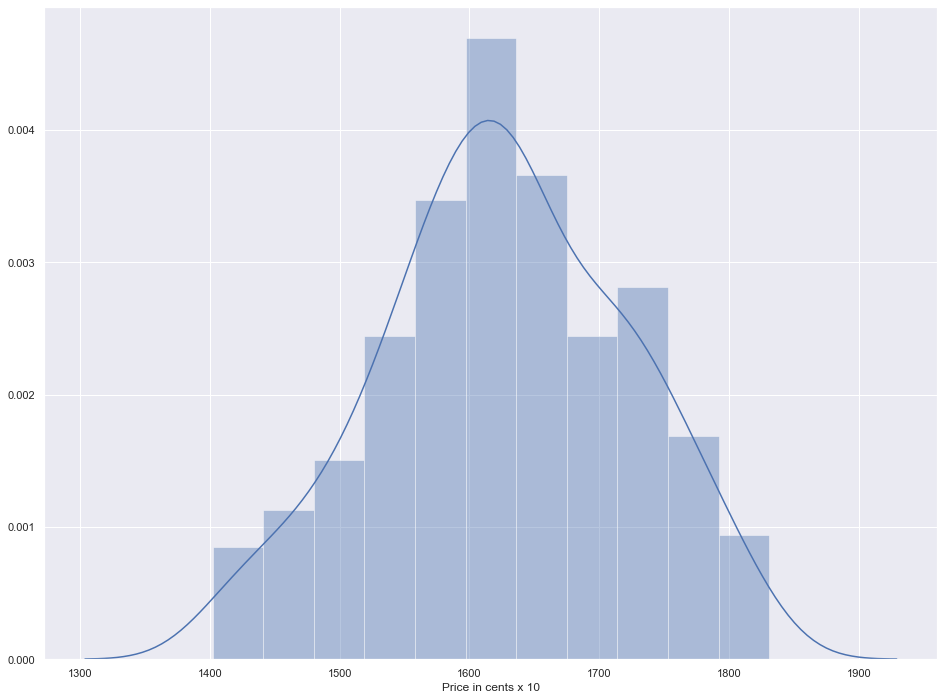

In [47]:
#df.info()
#df.plot()
# df.hist()
ax = sns.distplot(df.price)
ax.set(xlabel='Price in cents x 10')
plt.show()

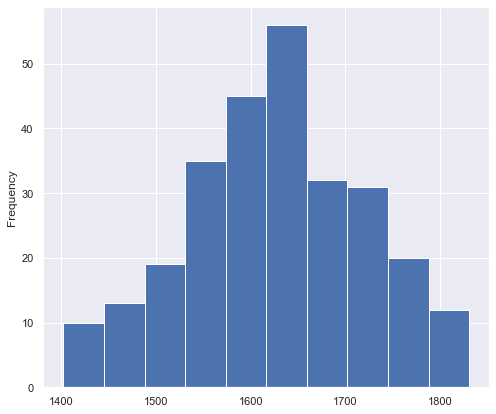

In [48]:
# df.hist()
df.price.plot(kind='hist', figsize=(8,7), grid=True)
plt.show()

### Time Series Line Plots by month

In [49]:
groups = df.groupby(Grouper(freq='MS'))
# groups = df.price.groupby(Grouper(freq='25D'))

# my_list = []
# my_dict = {}
max_len = 0

for name, group in groups:
#     print(name)
    max_len = max(max_len, len(group.values))

# print(max_len)
months = pd.DataFrame({})

for name, group in groups:
#     print(name.strftime('%b'))
    my_list = group.values
#     print(my_list)
    
    if len(my_list) < max_len:
#         print('add:', max_len - len(my_list))
        last = my_list[-1]
    
        for i in range(max_len - len(my_list)):
            my_list = np.append(my_list, last)
#             print(last)
#         print(my_list)
#     break
    name_month = name.strftime('%b')
#     name_month = name.strftime('%U')
#     my_dict[name_month] = my_list
    months[name_month] = my_list
#     my_list.append({name_month: group.values})

# months = pd.DataFrame(my_list)    
# months.head()
sns.set(rc={'figure.figsize':(16, 20)})
# plt.title('NSW Average Fuel Price Premium 98')
months.plot(subplots=True, legend=False)
plt.show()

### Time Series Box and Whisker Plots by month

In [50]:
sns.set(rc={'figure.figsize':(16, 12)})
months.boxplot()
plt.show()

### Time Series Box and Whisker Plots by week

In [51]:
#weeks = df.groupby(Grouper(freq='W'))
#weeks = pd.concat([pd.DataFrame(x[1].values) for x in weeks], axis=1)
#weeks = pd.DataFrame(weeks)
#weeks.columns = range(1,33)

#weeks.boxplot()
#plt.show()

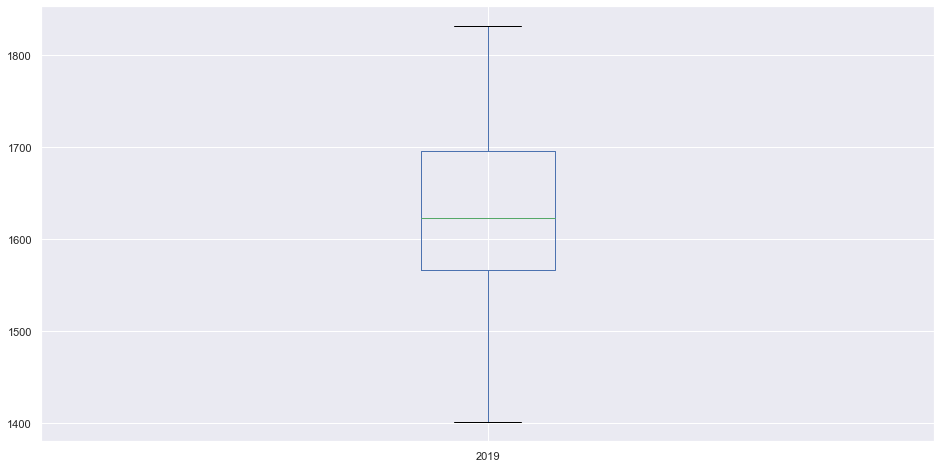

In [54]:
# by years
years = df.groupby(Grouper(freq='Y'))
years = pd.concat([pd.DataFrame(x[1].values) for x in years], axis=1)
# years.columns = range(2017,2020)
years.columns = [2019]
years.boxplot(figsize=(16,8))

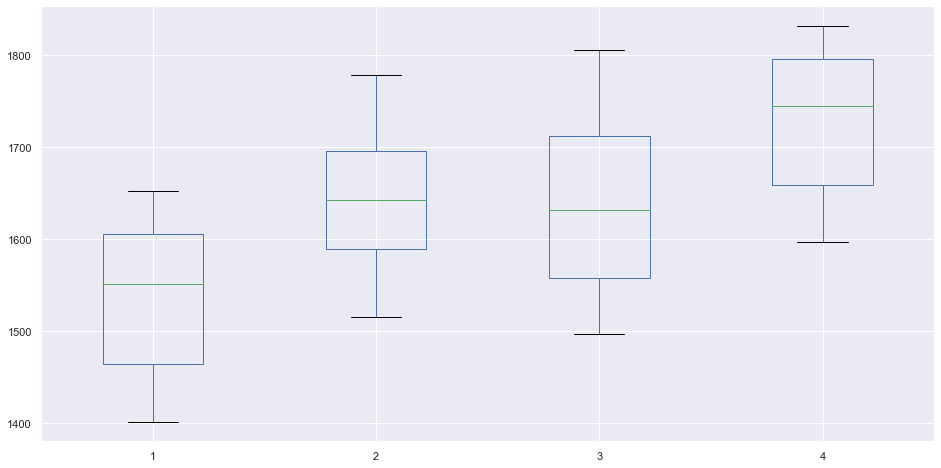

In [59]:
# by quarter
quarters = df.groupby(Grouper(freq='Q'))
quarters = pd.concat([pd.DataFrame(x[1].values) for x in quarters], axis=1)
# quarters.columns = range(1,13)
quarters.columns = range(1,5)
quarters.boxplot(figsize=(16,8))

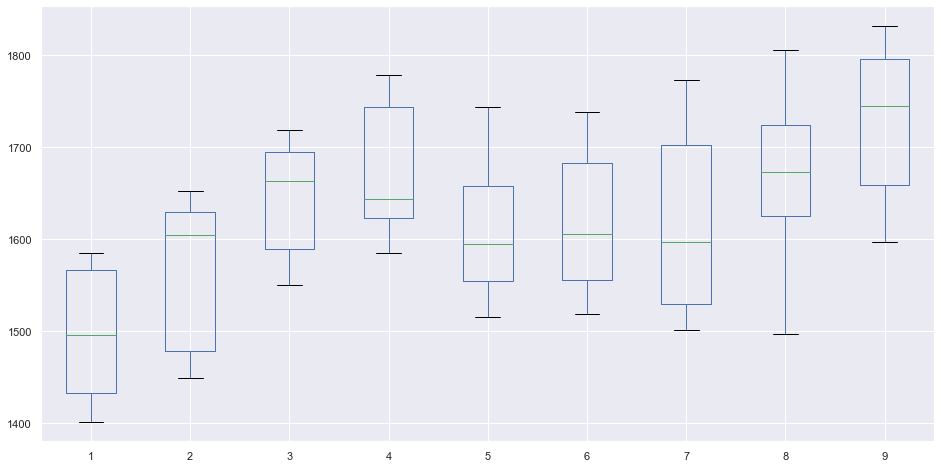

In [61]:
# by months
months = df.groupby(Grouper(freq='MS'))
months = pd.concat([pd.DataFrame(x[1].values) for x in months], axis=1)
# months.columns = range(1,37)
months.columns = range(1,10)
months.boxplot(figsize=(16,8))

In [62]:
# months.info()

#### Monthly Prices from Jun to Dec 2019

### Time Series Heat Map by month

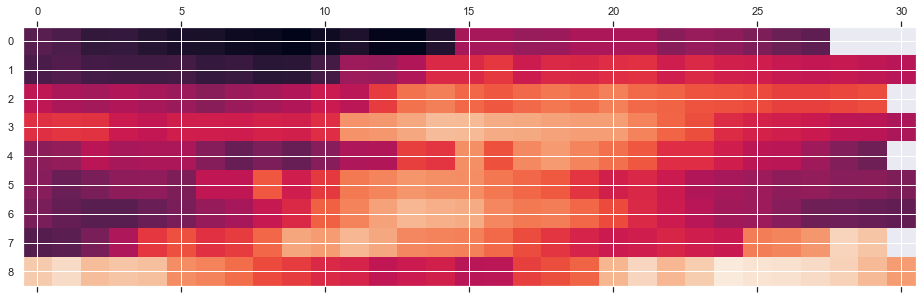

In [63]:
plt.matshow(months.T, interpolation=None, aspect='auto')
plt.show()

### Time Series Lag Scatter Plot

In [64]:
# from pandas.plotting import lag_plot
# https://machinelearningmastery.com/time-series-data-visualization-with-python/
# for lag in range(3):
#     print(lag)
#     lag_plot(df.price, lag=lag + 1)
#     plt.show()

In [65]:
df.price.autocorr(3)

0.8336703353334072

### Time Series Autocorrelation Plot

In [66]:
sns.set(rc={'figure.figsize':(16, 12)})
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.price)
plt.show()

In [67]:
#from pandas.plotting import lag_plot
#lag_plot(df)

In [68]:
df.describe()

price
count   273.000000
mean   1626.095238
std      95.000184
min    1402.000000
25%    1566.000000
50%    1623.000000
75%    1696.000000
max    1831.000000

### Time Series Line Plot

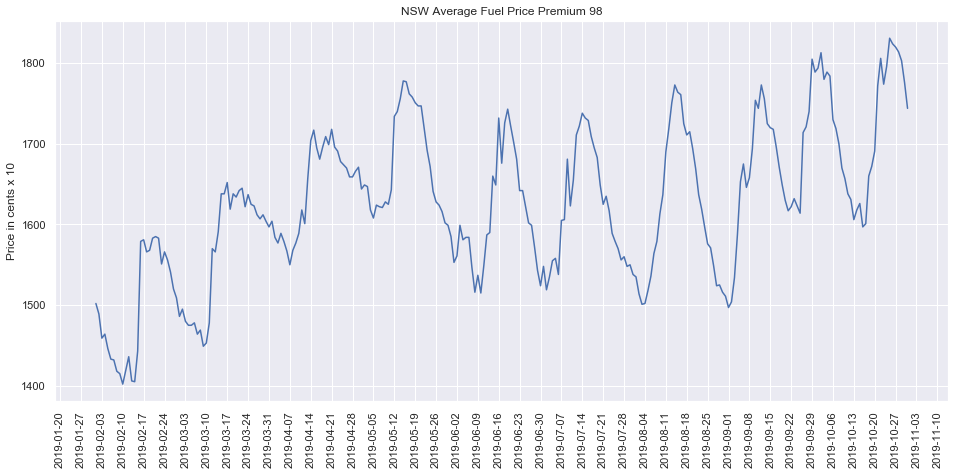

In [69]:
from matplotlib.ticker import *
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set(rc={'figure.figsize':(16, 7)})
ax = sns.lineplot(x=df.index, y=df.price)
plt.xticks(rotation=90)
ax.set(xlabel=None, ylabel='Price in cents x 10')
ax.xaxis.set_major_locator(MultipleLocator(7))
plt.title('NSW Average Fuel Price Premium 98')
plt.show()

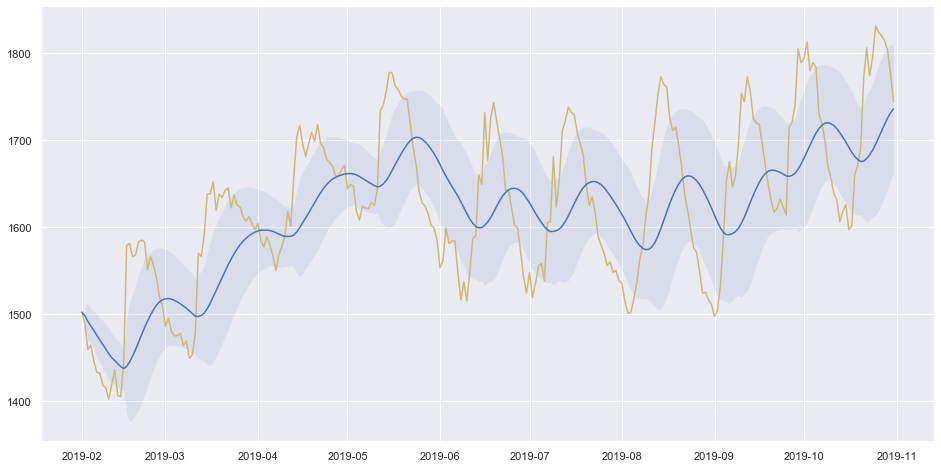

In [70]:
days = 20
# ma = df.price.rolling(days).mean()
ema = df.price.ewm(span=days).mean()
ema = ema.ewm(span=8).mean()
# mstd = df.price.rolling(days).std()
emstd = df.price.ewm(span=days).std()
plt.figure(figsize=(16, 8))
plt.plot(df.index, df.price, c='y')
plt.plot(ema.index, ema)
plt.fill_between(emstd.index, ema - 1 * emstd, ema + 1 * emstd, alpha=0.1)
plt.show()

In [71]:
# df.loc['2019-12-01':'2019-12-15']

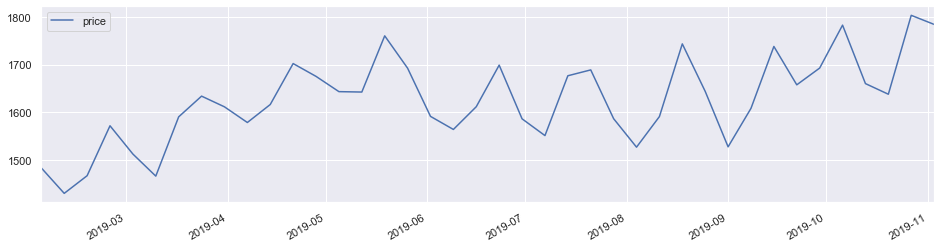

In [72]:
df.resample('W').mean().plot(figsize=(16,4), grid=True, x_compat=True)
# _ = df.plot(figsize=(16,8), grid=True, x_compat=True)

In [73]:
df.resample('10D').mean().plot(figsize=(16,4), grid=True, x_compat=True)

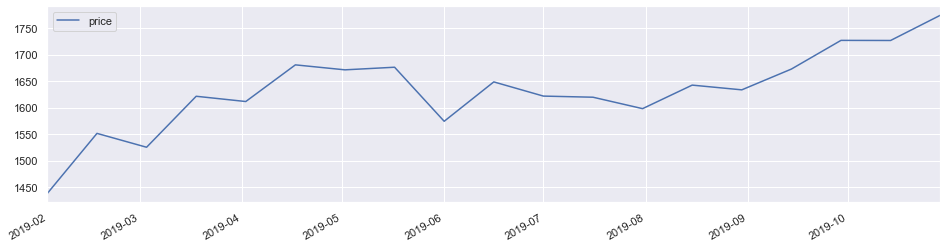

In [74]:
df.resample('15D').mean().plot(figsize=(16,4), grid=True, x_compat=True)

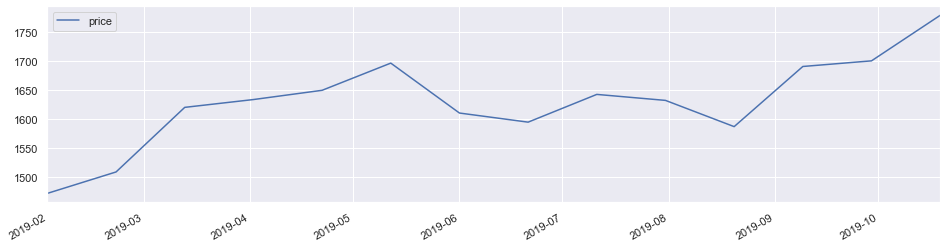

In [75]:
df.resample('20D').mean().plot(figsize=(16,4), grid=True, x_compat=True)

* 06-09 to 06-30 - 21
* 06-30 to 08-04 - 35
* 08-04 to 09-01 - 28
* 09-01 to 09-22 - 21
* 09-22 to 10-13 - 21
* 10-13 to 11-10 - 28
* 12-05 to 12-29 - 25, 24

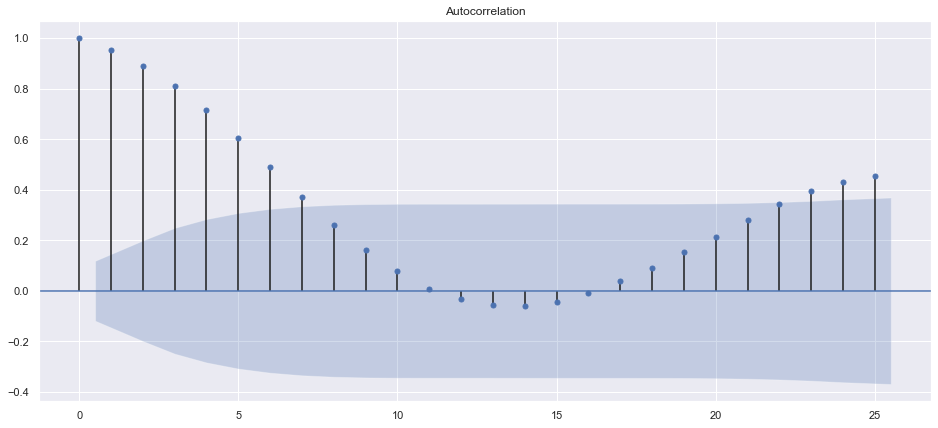

In [76]:
sm.graphics.tsa.plot_acf(df)
plt.show()

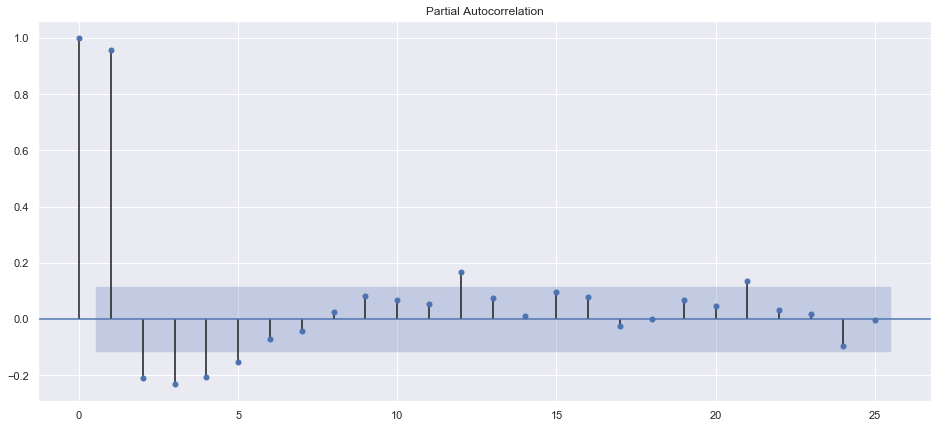

In [77]:
sm.graphics.tsa.plot_pacf(df)
plt.show()

In [78]:
# hie_data = sm.datasets.randhie.load_pandas()
# corr_matrix = np.corrcoef(hie_data.data.T)
# sm.graphics.plot_corr_grid([corr_matrix] * 8, xnames=hie_data.names)
# plt.show()

In [79]:
# b = date(2019,12,29)
# a = date(2019,12,5)
# (a-b).days
# (21+35+28+21+21+28+25+24)/8

In [80]:
# test if data is stationary 

from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
register_matplotlib_converters()

def test_stationarity(df, sdt_adjust=0):
    rolmean = df.rolling(22).mean()
    rolstd = sdt_adjust + df.rolling(22).std()

    #Plot rolling statistics:
    plt.figure(figsize=(16, 8))
    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std (Adjusted)')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df.price)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    

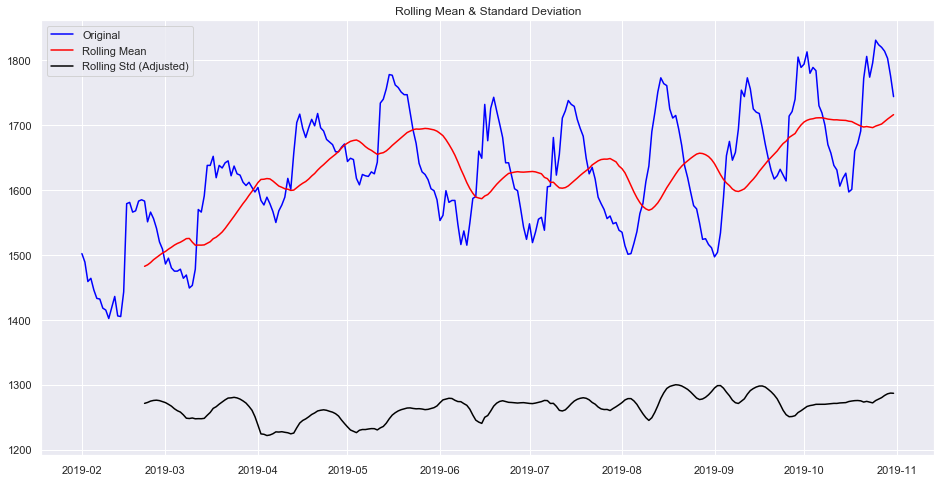

Results of Dickey-Fuller Test:
Test Statistic                  -3.226713
p-value                          0.018490
#Lags Used                      12.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64


In [81]:
test_stationarity(df, 1_200)

In [82]:
df_new = df.copy()
df_new['ma'] = df_new.rolling(64).mean()
df_new['price'] = df_new.price - df_new.ma
df_new.dropna(inplace=True)
del df_new['ma']
test_stationarity(df_new, 150)

Results of Dickey-Fuller Test:
Test Statistic                  -5.423543
p-value                          0.000003
#Lags Used                       4.000000
Number of Observations Used    205.000000
Critical Value (1%)             -3.462658
Critical Value (5%)             -2.875744
Critical Value (10%)            -2.574341
dtype: float64


In [83]:
df_new = df.copy()
df_new['ewm'] = df_new.price.ewm(span=7).mean()
df_new['price'] = df_new.price - df_new['ewm']
# df_new.dropna(inplace=True)
del df_new['ewm']
# df_new
test_stationarity(df_new, 100)

Results of Dickey-Fuller Test:
Test Statistic                -7.559446e+00
p-value                        3.037445e-11
#Lags Used                     1.000000e+01
Number of Observations Used    2.620000e+02
Critical Value (1%)           -3.455558e+00
Critical Value (5%)           -2.872636e+00
Critical Value (10%)          -2.572683e+00
dtype: float64


In [84]:
df_new = df.copy()
# df_new['ma'] = df_new.rolling(64).mean()
df_new['price'] = df_new.price - df_new.price.shift()
df_new.dropna(inplace=True)
# del df_new['ma']
# df_new
test_stationarity(df_new, 150)

Results of Dickey-Fuller Test:
Test Statistic                -7.779662e+00
p-value                        8.483829e-12
#Lags Used                     1.100000e+01
Number of Observations Used    2.600000e+02
Critical Value (1%)           -3.455754e+00
Critical Value (5%)           -2.872721e+00
Critical Value (10%)          -2.572728e+00
dtype: float64


In [85]:
# import statsmodels.api as sm
# decom_result = sm.tsa.seasonal_decompose(df.price)
# dir(decom_result)
# fig = decom_result.plot()
# fig.set_size_inches(16, 8)
# plt.show()

In [86]:
# df_new = pd.DataFrame(decom_result.resid)
# df_new.dropna(inplace=True)
# df_new
# test_stationarity(df_new, 75)

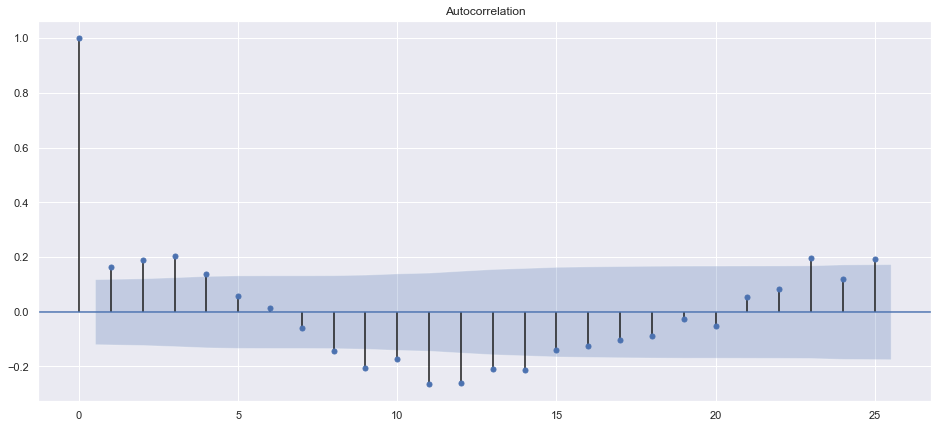

In [87]:
sns.set(rc={'figure.figsize':(16, 7)})
sm.graphics.tsa.plot_acf(df_new)
plt.show()

In [88]:
sm.graphics.tsa.plot_pacf(df_new)
plt.show()

In [89]:
# p = 1
# q = 1

In [90]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df, order=(2, 1, 2))  
results_AR = model.fit(disp=-1)  
# results_AR
plt.plot(df_new)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_new.price)**2))

Text(0.5, 1.0, 'RSS: 158971.5713')

In [91]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

2019-02-02    0.874473
2019-02-03   -2.347632
2019-02-04   -7.272699
2019-02-05   -3.456164
2019-02-06   -4.683738
Freq: D, dtype: float64

In [92]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

2019-02-02     0.874473
2019-02-03    -1.473159
2019-02-04    -8.745858
2019-02-05   -12.202022
2019-02-06   -16.885760
Freq: D, dtype: float64

In [93]:
predictions_ARIMA_log = pd.Series(df.iloc[0], index=df.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

2019-02-01          NaN
2019-02-02     0.874473
2019-02-03    -1.473159
2019-02-04    -8.745858
2019-02-05   -12.202022
Freq: D, dtype: float64

In [95]:
# predictions_ARIMA = np.exp(predictions_ARIMA_log)
# plt.plot(df)
# plt.plot(predictions_ARIMA)
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df.price)**2)/len(df)))